In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import classification_report, accuracy_score, mean_absolute_error, mean_squared_error, roc_auc_score, roc_curve, auc, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df = pd.read_csv('/content/creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
3968,3617,1.134592,0.252051,0.488592,0.799826,-0.264819,-0.369918,-0.243365,0.049761,1.210818,...,-0.351115,-0.851463,0.186169,0.092463,0.020015,0.057976,-0.046611,0.012562,13.99,0.0
3969,3621,-1.338671,1.080974,1.291196,0.719258,0.101320,0.053896,0.001297,-0.917575,1.638510,...,0.498030,-0.483932,0.037686,0.053566,-0.560078,0.230423,-0.119911,0.321847,27.43,0.0
3970,3622,-0.339728,-2.417449,0.975517,2.537995,-1.720361,0.863005,0.032965,0.026764,2.487139,...,0.391639,0.264432,-0.735031,0.450594,0.310022,-0.231357,-0.049872,0.153526,730.32,0.0
3971,3623,-0.368639,0.947432,1.707755,0.932092,0.292956,0.189100,0.499330,0.132466,0.779412,...,-0.119045,0.056665,-0.172703,0.170073,0.139605,-0.420518,0.033794,0.005996,6.87,0.0
3972,3624,-0.663445,1.162921,1.508050,0.549405,0.231377,-0.106041,0.817977,-0.387026,1.488054,...,-0.420337,-0.361357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe(include = 'all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,43664.00000,43664.000000,43664.000000,43664.000000,43664.000000,43664.000000,43664.000000,43664.000000,43664.000000,43664.000000,...,43664.000000,43664.000000,43664.000000,43664.000000,43664.000000,43664.000000,43664.000000,43664.000000,43664.000000,43664.000000
mean,26888.25284,-0.233273,0.031606,0.700508,0.191731,-0.243618,0.099239,-0.117611,0.051499,0.173603,...,-0.026792,-0.110075,-0.039981,0.009712,0.136448,0.022633,0.006871,0.005107,90.313927,0.003069
std,12814.99066,1.881487,1.614103,1.524287,1.407338,1.409001,1.310495,1.272765,1.214443,1.226176,...,0.739609,0.637124,0.568360,0.592318,0.437462,0.503349,0.390440,0.342265,238.439222,0.055313
min,0.00000,-56.407510,-72.715728,-32.454198,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-8.507059,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.438650,-8.567638,-9.617915,0.000000,0.000000
25%,18719.75000,-0.980241,-0.538882,0.225681,-0.715653,-0.848251,-0.637897,-0.599128,-0.149257,-0.579444,...,-0.233410,-0.530920,-0.179112,-0.321968,-0.128037,-0.329466,-0.063371,-0.006843,7.570000,0.000000
50%,31883.00000,-0.244783,0.091807,0.804944,0.190472,-0.277415,-0.155863,-0.072568,0.053267,0.053757,...,-0.072254,-0.084865,-0.051512,0.062302,0.175968,-0.066830,0.008636,0.021760,24.895000,0.000000
75%,36950.00000,1.158119,0.740709,1.437905,1.071096,0.290816,0.486612,0.431337,0.322613,0.881798,...,0.104877,0.302064,0.077031,0.401497,0.421923,0.303412,0.084706,0.076344,81.565000,0.000000
max,41600.00000,1.960497,17.930550,4.101716,16.491217,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,7879.420000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3973 entries, 0 to 3972
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    3973 non-null   int64  
 1   V1      3973 non-null   float64
 2   V2      3973 non-null   float64
 3   V3      3973 non-null   float64
 4   V4      3973 non-null   float64
 5   V5      3973 non-null   float64
 6   V6      3973 non-null   float64
 7   V7      3973 non-null   float64
 8   V8      3973 non-null   float64
 9   V9      3973 non-null   float64
 10  V10     3973 non-null   float64
 11  V11     3973 non-null   float64
 12  V12     3973 non-null   float64
 13  V13     3973 non-null   float64
 14  V14     3973 non-null   float64
 15  V15     3973 non-null   float64
 16  V16     3973 non-null   float64
 17  V17     3973 non-null   float64
 18  V18     3973 non-null   float64
 19  V19     3973 non-null   float64
 20  V20     3973 non-null   float64
 21  V21     3973 non-null   float64
 22  

In [ ]:
df.fillna(df.mean(), inplace=True)
df.fillna(df.mean(), inplace=True)

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Class
0.0    3971
1.0       2
Name: count, dtype: int64


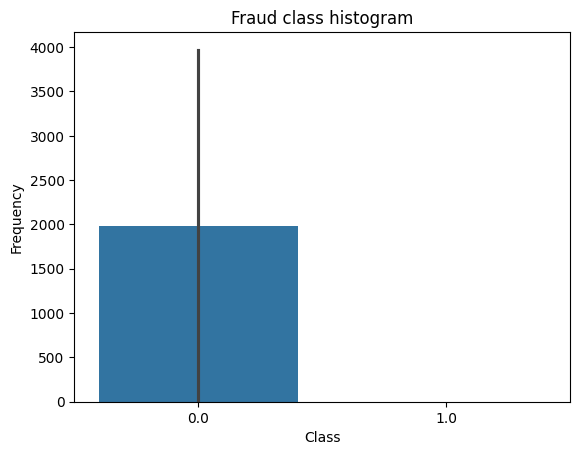

In [ ]:
print(df["Class"].value_counts())

sns.barplot(x ='Class'
            ,y =df['Class'].value_counts()
            ,data =df)

plt.title('Fraud class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')

plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
std =StandardScaler()
amount =np.array(df['Amount'])
amount_reshaped =amount.reshape(-1 ,1)
df['normAmount'] =std.fit_transform(amount_reshaped)

In [ ]:
df = df.drop(['Time', 'Amount'], axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0,0.396169
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0,-0.291587
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0,1.468268
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0,0.273905
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0,0.023433


In [ ]:
X =np.array(df.iloc[: ,df.columns != "Class"])
y =np.array(df.iloc[: ,df.columns =="Class"])
print("shape of x :" ,X.shape)
print("shape of y :" ,y.shape)

shape of x : (43664, 30)
shape of y : (43664, 1)


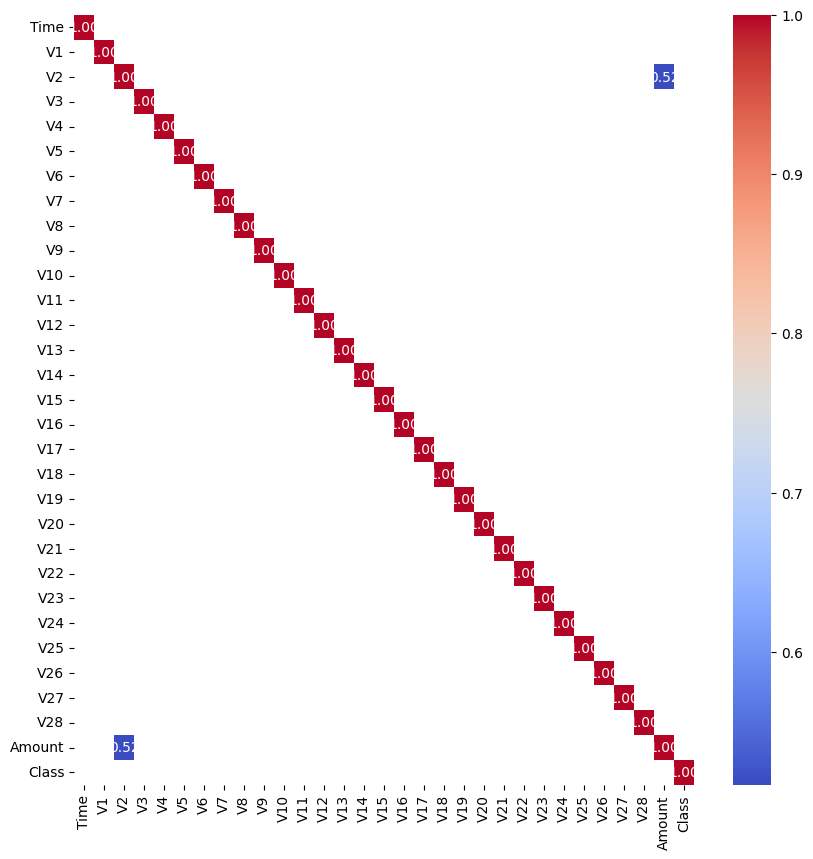

In [ ]:
corr =df.corr().abs()
high_corr =corr[(corr)>0.5]
plt.figure(figsize =(10 ,10))
sns.heatmap(high_corr ,annot =True ,fmt ='0.2f',cmap='coolwarm')
plt.show()

In [ ]:
df[df["Class"] ==1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1.0
623,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1.0
4920,4462,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1.0
6108,6986,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1.0
6329,7519,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43061,41353,-15.020981,8.075240,-16.298091,5.664820,-11.918153,-4.246957,-14.716668,9.435084,-6.795398,...,2.525115,-0.832074,-0.186117,0.429781,0.697103,0.056031,-1.310888,-0.707403,34.12,1.0
43160,41397,-14.970346,8.401421,-16.867238,8.252334,-13.565130,-2.782438,-14.263735,9.643419,-7.701499,...,2.714045,-0.101355,-0.439666,0.519514,0.789328,0.064357,-1.621386,-1.104819,273.01,1.0
43204,41413,-15.140450,7.378042,-16.356367,9.194935,-13.466163,-2.958431,-16.165539,10.075254,-7.901821,...,3.147428,0.341678,-1.150162,0.795190,-0.194542,0.145964,-2.458680,-1.189888,106.55,1.0
43428,41505,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1.0


In [ ]:
df[df['Class']==0]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43658,41598,-0.319097,1.216372,0.770942,0.305980,0.718387,-0.371581,1.219717,-0.299580,-0.808841,...,0.018979,0.102120,-0.318324,-0.424313,0.452073,-0.362634,-0.082331,0.004286,33.41,0.0
43659,41598,-0.538686,-0.635328,-0.041569,-3.022158,0.771776,3.556774,-1.418820,1.371999,-2.475053,...,-0.090409,-0.310254,0.168510,0.955413,-0.427495,-0.375891,0.051010,0.072416,60.01,0.0
43660,41599,-0.349615,-2.860571,0.297766,0.801212,-1.523995,1.164260,0.037484,0.325220,0.862825,...,0.315370,-0.503099,-0.514747,-0.193890,-0.327091,0.875820,-0.144908,0.125368,745.56,0.0
43661,41599,-3.001222,2.899766,0.726874,-0.729992,-0.312792,-0.735557,0.960944,-0.276141,2.128747,...,-0.645540,-0.613956,0.111663,0.338567,0.268357,0.076981,1.184716,0.491066,8.99,0.0


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train ,X_test ,y_train ,y_test =train_test_split(X ,y ,test_size =0.3 ,random_state=0)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (30564, 30)
Number transactions y_train dataset:  (30564, 1)
Number transactions X_test dataset:  (13100, 30)
Number transactions y_test dataset:  (13100, 1)


In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': [99]
Before OverSampling, counts of label '0': [30465] 

After OverSampling, the shape of train_X: (60930, 30)
After OverSampling, the shape of train_y: (60930,) 

After OverSampling, counts of label '1': 30465
After OverSampling, counts of label '0': 30465


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix ,precision_recall_curve ,auc ,roc_auc_score ,roc_curve ,recall_score ,classification_report


parameters = {
    'C': np.linspace(1, 10, 10)
             }

lr = LogisticRegression()
clf = GridSearchCV(lr,
                   parameters,
                   cv=5,
                   verbose=5,
                   n_jobs=3)
clf.fit(X_train_res, y_train_res.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=3,
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
             verbose=5)

In [ ]:
clf.best_params_

{'C': 4.0}

In [ ]:
lr1 =LogisticRegression(C=9.0 ,penalty ='l2' ,verbose=5)
lr1.fit(X_train_res ,y_train_res.ravel())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=9.0, verbose=5)

In [ ]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    print('thresh' ,thresh)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white"
                 if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the train dataset: 94.94949494949495%
thresh 14898.5


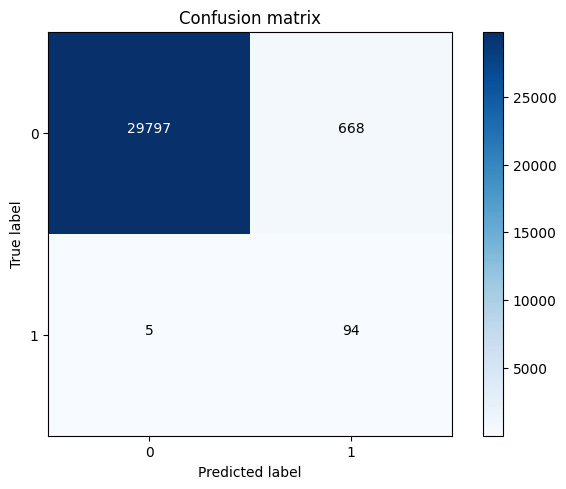

In [ ]:
y_train_pre = lr1.predict(X_train)

cnf_matrix_tra = confusion_matrix(y_train, y_train_pre)

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

Recall metric in the testing dataset: 94.28571428571429%
thresh 6379.0


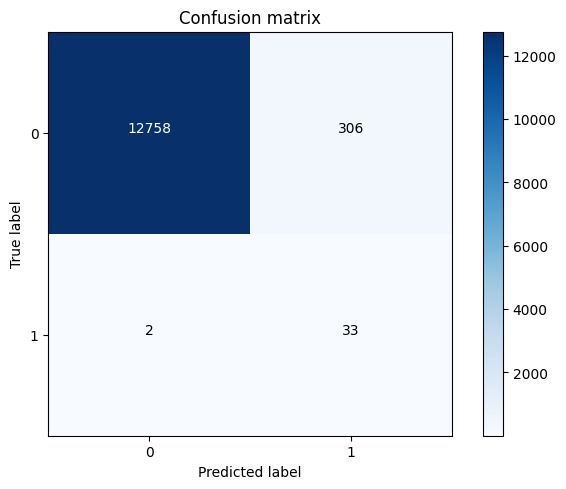

In [ ]:
import pandas as pd

# Convert X_train and X_test to Pandas DataFrames if they are NumPy arrays
if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train)
if isinstance(X_test, np.ndarray):
    X_test = pd.DataFrame(X_test)

X_train_no_nan = X_train.dropna()
y_train_no_nan = y_train[X_train_no_nan.index]  # Adjust y_train accordingly

X_test_no_nan = X_test.dropna()
y_test_no_nan = y_test[X_test_no_nan.index]   # Adjust y_test accordingly

# Now use X_train_no_nan, y_train_no_nan, X_test_no_nan, and y_test_no_nan
y_pre = lr1.predict(X_test_no_nan.values) # Convert back to NumPy array for prediction

# ... rest of your code ...

cnf_matrix = confusion_matrix(y_test_no_nan, y_pre) # Use y_test_no_nan for consistency

print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
#print("Precision metric in the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

In [ ]:
tmp = lr1.fit(X_train_res, y_train_res.ravel())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

model_DTC = DecisionTreeClassifier()
model_DTC.fit(X_train, y_train)

model_RFC = RandomForestClassifier(n_estimators=100, random_state=42)
model_RFC.fit(X_train, y_train)

model_XGB = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
model_XGB.fit(X_train, y_train)

model_SVC = SVC(kernel='rbf', random_state=42)
model_SVC.fit(X_train, y_train)

model_KNN = KNeighborsClassifier(n_neighbors=2)
model_KNN.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-57-864452c7b4b8>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RFC.fit(X_train, y_train)
/u

KNeighborsClassifier(n_neighbors=2)